# Supervised Learning Algorithms - Decision Trees
Implement decision trees considering a data set of your choice. Create an ID3 Decision Tree. Implement the ID3 algorithm on your own. Use a pre-defined sklearn library for both Entropy-Information Gain as well as Gini Index calculation. Compare the results you got between your hand-coded algorithm and sklearn. Draw the decision tree. Write the interference on the choice of the root node, the internal nodes and the leaf nodes. Also calculate the Decision Tree model measurement metrics such as confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.Write the inference.

#### Import libraries and load data

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn import metrics

import numpy

#### Loading Dataset

In [2]:
df = pd.read_csv(r"./Datasets/playtennis.csv")
df.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


#### Encoding Data

In [3]:
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


#### Building the decision tree using ID3

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

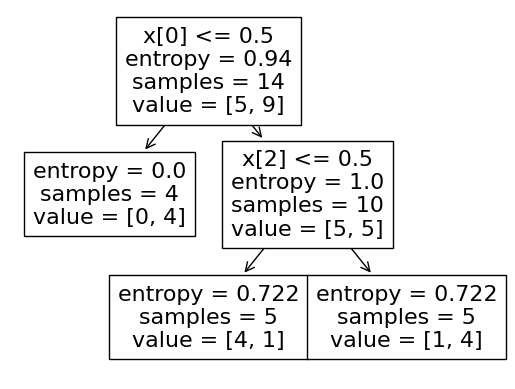

In [4]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
model_id3 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
model_id3.fit(X,Y)
tree.plot_tree(model_id3)


#### Confusion Matrix and metrics for ID3

Accuracy :  0.8571428571428571
Precison  :  0.8571428571428571
Recall Score :  0.8571428571428571
F1 Score :  0.8571428571428571
MCC :  0.6888888888888889


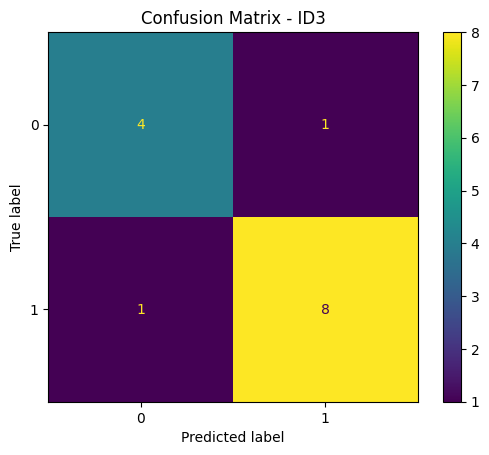

In [5]:
pred_id3 = model_id3.predict(X)
cm_id3 = confusion_matrix(Y,pred_id3)
print('Accuracy : ' , accuracy_score(Y, pred_id3))
print('Precison  : ' , metrics.precision_score(Y, pred_id3, average="weighted"))
print('Recall Score : ' , metrics.recall_score(Y, pred_id3, average="weighted"))
print('F1 Score : ' , metrics.f1_score(Y, pred_id3, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(Y, pred_id3))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_id3)
disp.plot()
plt.title('Confusion Matrix - ID3')
plt.show()

#### Building the decision tree using CART

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]')]

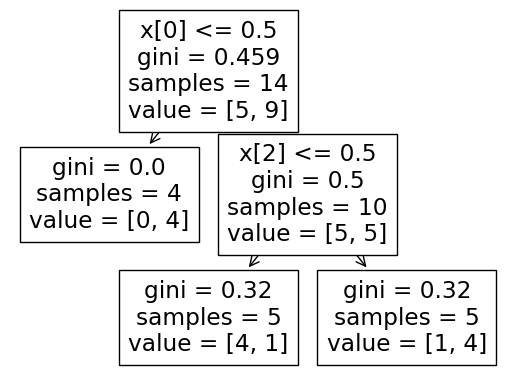

In [6]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
model_cart = DecisionTreeClassifier(criterion = 'gini',max_depth = 2)
model_cart.fit(X,Y)
tree.plot_tree(model_cart)


#### Confusion Matrix and metrics for ID3

Accuracy :  0.8571428571428571
Precison  :  0.8571428571428571
Recall Score :  0.8571428571428571
F1 Score :  0.8571428571428571
MCC :  0.6888888888888889


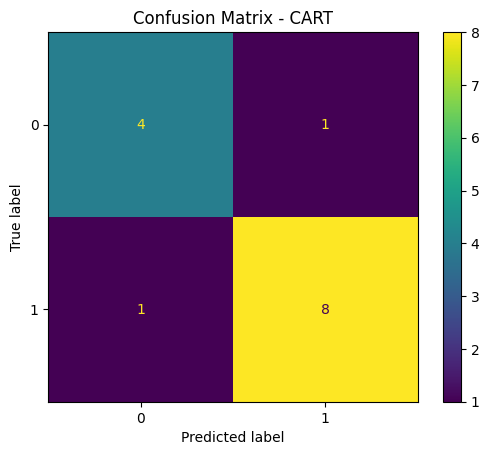

In [7]:
pred_cart = model_cart.predict(X)
cm_id3 = confusion_matrix(Y,pred_cart)
print('Accuracy : ' , accuracy_score(Y, pred_cart))
print('Precison  : ' , metrics.precision_score(Y, pred_cart, average="weighted"))
print('Recall Score : ' , metrics.recall_score(Y, pred_cart, average="weighted"))
print('F1 Score : ' , metrics.f1_score(Y, pred_cart, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(Y, pred_cart))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_id3)
disp.plot()
plt.title('Confusion Matrix - CART')
plt.show()